In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error, SCORERS
import scipy as sp
from joblib import dump,load
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNetCV, ElasticNet, LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
import plotly.express as px

# Logistic Regression

Is a classification algorithim designed to predict categorical data.

## Linear to logistic convertion

Having a dataset with two values such as True and False (1, 0), linear regression wouldnt work as we are going to have a large amount of outliers.

During logistic regression we are going to treat y as a probability plot of a value for x to be either a $0$ or a $1$, setting $0.5$ as a cutoff.

To convert this function, we just have to plug our linear regression function into the logistic regression, but how do we relate out $\beta$ coeff with our results?

### Logistic Function

$$ \sigma (x) = \frac{1} {1+e^{-x}}  $$

### Linear Regression Function
$$
\hat{y} =  \beta_0 x_0 + ... + \beta_n x_n = \sum_{i=0}^n \beta_i x_i
$$

### Transformation

$$
\hat{y} = x 
$$
$$
\sigma (x) = \frac{1} {1+e^{-\sum_{i=0}^n \beta_i x_i}} 
$$
We can also write it like this.
$$
\hat{y} = \sigma \left({\sum_{i=0}^n \beta_i x_i}\right)
$$

For us to understand our predicted outputs we need to understand **odds**.

## Odds function

The odds of an event with probability **p** is defined by the chance of the event happening divided by the chance of it not happening.

$$
\frac{p}{1-p}
$$

Having and event with  $50$% of probability would follow the next odds:

$$
\frac{0.5}{1-0.5} = \frac{0.5}{0.5} = \frac{1}{1}
$$

Giving us 1 to 1 odds of it ocurring.

For our transformed function we can solve for the coeff and feature x in terms of the log odds. How do we olve for the log odds?

$$
\hat{y} + \hat{y}e^{-\sum_{i=0}^n \beta_i x_i} = 1 
$$

We subtract $\hat{y}$ from both sides, resulting in:

$$
\hat{y}e^{-\sum_{i=0}^n \beta_i x_i} = 1 - \hat{y}
$$

Now we divide both sides by $\hat{y}$ and rearrange:

$$
\frac{\hat{y}}{1 - \hat{y}} = e^{\sum_{i=0}^n \beta_i x_i}
$$

We are able to remove the constant $e$ from the equation by taking the natural logarithm of the function:

$$
ln\left( \frac{\hat{y}}{1 - \hat{y}} \right) = \sum_{i=0}^n \beta_i x_i
$$

Here we can see that we end up with the natural logarithim of the odds function.

Some things to take into consideration are the following:

$$
 \lim\limits_{p \rightarrow 1} ln\left( \frac{p}{1 - p} \right) = \infty
$$

$$
ln\left( \frac{0.5}{1 - 0.5} \right) = ln(1) = 0
$$

$$
 \lim\limits_{p \rightarrow 0} ln\left( \frac{p}{1 - p} \right) = -\infty
$$

Even with all of this we are undable to directly link our coeff to _one uniit increase_ as it was with Linear Regression. But we can check for the following:


#### Sign
> - We can check for the sign of the coeff, a positive value indicates a likelihood of resulting in $1$, and a negative value indicates a decrease in the likelihood of the class belongiing to $1$. 

#### Magnitude
> - We can't directly interpret the  magnitude of $\beta$ but we can compare the magnitudes of the coeff with each other indicating which coeff is more likely to produce an output of $1$.
> - We  can compare the odds ratio between our coeffs.


## Finding the best fit for our model

Log regression uses Max Likelihood to find the best fitting model.

For this wee first have to convert from log odds to probability.

## Log odds to probability

$$
ln \left(\frac{p}{1-p}\right) = ln(odds)
$$

$$
\frac{p}{1-p} = e^{ln(odds)}
$$

$$
p =  (1-p)e^{ln(odds)}
$$

$$
p = e^{ln(odds)} -pe^{ln(odds)}
$$

$$
p + pe^{ln(odds)} = e^{ln(odds)}
$$

$$
p(1+e^{ln(odds)}) = e^{ln(odds)}
$$

$$
p = \frac{e^{ln(odds)}}{1+e^{ln(odds)}}
$$

If we have our odd points, we can plug them into the equation above and multiply their results to give us the likelihood:

$$
Likelihood = \prod_{i=0}^n p_i = \prod_{i=0}^n\frac{e^{ln(odds_i)}}{1+e^{ln(odds_i)}}
$$


# Python

We have a dataset of 5000 pacients with the following features and targets.

- **Features**
>   - age
>   - physical score

- **Target**
>   - test results (0 or 1)

We want a model that can predict using its age and score, if they are going to pass the physical exam.


## Exploring our data

Let's import the data.

In [16]:
df = pd.read_csv('../DATA/hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


We can check the value counts for our test results.

1    3000
0    2000
Name: test_result, dtype: int64

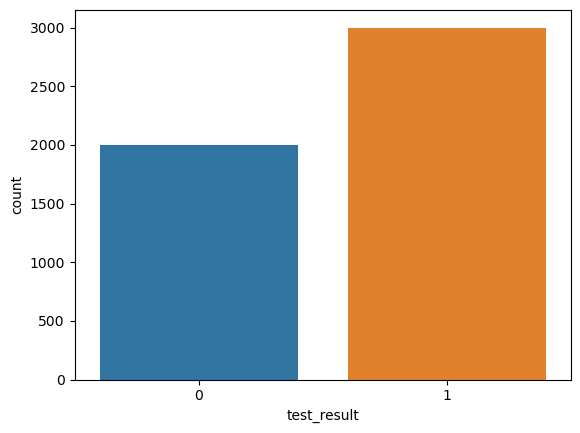

In [17]:
sns.countplot(data=df, x='test_result')

df['test_result'].value_counts()

Let's check the distribution of the features using boxplot.

We can see that patients who fail the test $0$ are more likely to be of an older age, while patients who pass $1$ the test are usually younger.

<AxesSubplot:xlabel='test_result', ylabel='age'>

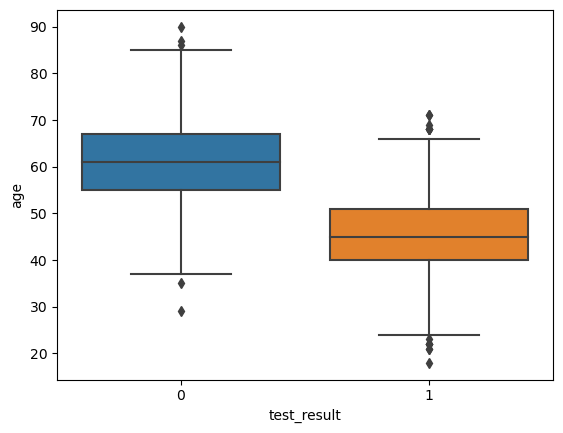

In [18]:
sns.boxplot(data=df, x='test_result', y='age')

We can now check for the relationship between the  test results and the physical score.

Here we can also see that people who pass the exam recieve a passing score, while patients who fail have a  lower physical score.

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

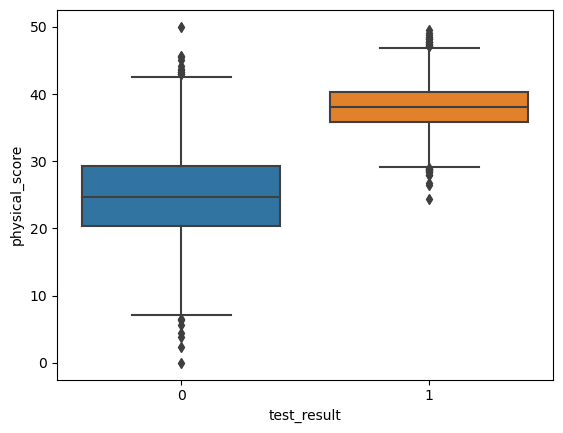

In [19]:
sns.boxplot(data=df, x='test_result', y='physical_score')

Let's now check the relationship between the physical score and the age.

Here we can see a trend that as your age increases the lower your phyisical scores.

<AxesSubplot:xlabel='age', ylabel='physical_score'>

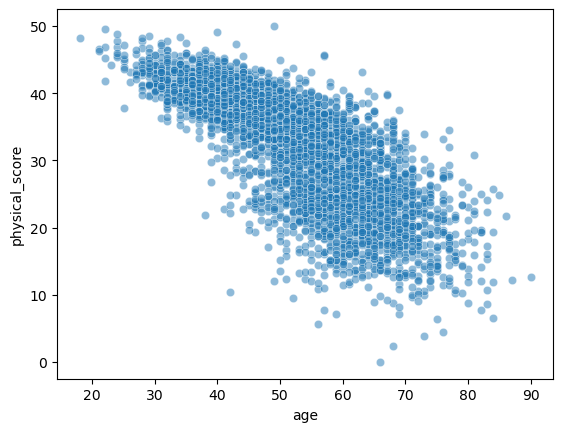

In [20]:
sns.scatterplot(data=df, x='age',y='physical_score', alpha=0.5)

Let's now include our test results as our hue.

<AxesSubplot:xlabel='age', ylabel='physical_score'>

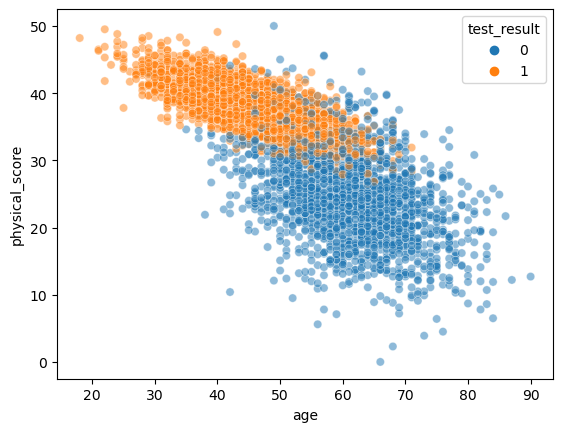

In [21]:
sns.scatterplot(data=df, x='age',y='physical_score', alpha=0.5, hue='test_result')

We can use pairplot to see all of this information in a more condensed way.

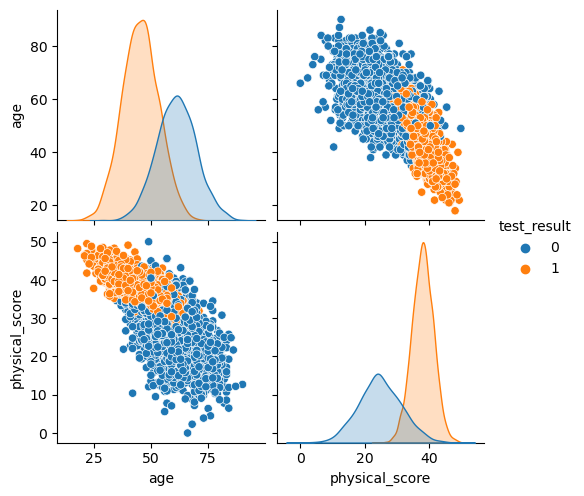

In [22]:
sns.pairplot(df,hue='test_result')

We can use a heatmap to see how much does each feature correlate to each other.

We can see a large correlation between our features.

<AxesSubplot:>

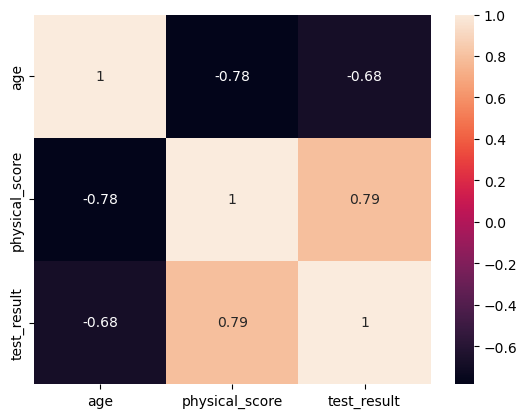

In [23]:
sns.heatmap(df.corr(), annot=True)

We can use plotly to display our data in 3d to see a clear separation of our two groups.

In [24]:
fig = px.scatter_3d(df, x='age', y='physical_score', z='test_result', color='test_result')

fig.show()

## Preparing our data

We are going to separate our data to perform a tts, then scale our data.

In [28]:
X = df.drop('test_result',axis=1)
y = df['test_result']

X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=0.1
                                       , random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

We are going to use the Logistic Regression function. We are going to use the default values for it's parameters.

In [31]:
log_model = LogisticRegression()

log_model.fit(scaled_X_train,y_train)

log_model.coef_

array([[-0.94953524,  3.45991194]])

Let's get the predictions.

In [32]:
y_pred = log_model.predict(scaled_X_test)

y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

## Classification Metrics

This will measure the performance of our predictions. We are going to see false positives or false negatives.

### Confusion Matrix
This is a metric that will give us the results of all four of our possibilities, each being:
> - True Positive
> - True Negative
> - False Positive
> - False Negative

### Accuracy
The accuracy of our model, meaning how often our model is correct, is given by the following equation:

$$
Acc = \frac{TP+TN}{Total}
$$

> **Imbalanced classes**
> - Here we get a paradox, which is that if we have a test that always results in positive results, can end with a high accuracy, which not always is correct.

### Recall (Sensitivity)
It answers the question, when it actually is a positive case, how often iit is correct, we get it through the  following equation:

$$
Recall = \frac{TP}{TotalP}
$$

If we have $0$ TP and $x$ Total Positives we are going to get the following:

$$
Recall = \frac{0}{x} = 0!
$$

This can alert us that a model is not catching relevant cases. Meaning it is reporting a majority in one class.

### Precision

This can tell us when the prediction is positive, how often it is correct. Given by the following equation:

$$
Precision = \frac{TP}{TotalPredPositive}
$$

### F1-Score
Since precision and recall are related to each other through the numerator TP, we can report the F1-Score. 

This is the harmonic mean of precision and recall, this harmonic mean can help us identify if one of our factors is $0$, as it will always be $0$ when one of our factors is $0$.

$$
F = \frac{2(precision)(recall)}{precision+recall}
$$

### ROC (Receiver Operator Characteristic) Curve

This is a curve the plots out the False Positives vs the True Positives, where having random guessing we should get a straight line on the $50\%$ mark.

> Previously we used a cutoff of $0.5$ as our cutoff for our logistic regression, but we are able to modify our cutoff to reflect more accurate data, this is in order to reduce the false negatives.

>In most cases we prefer to reduce the false negatives, such as in a viral infection where we would prefer to get a false negative.

For most cases we can use the **AUC** (Area Under the Curve) to compare our models. Having a perfect score of $1$. This is easier to compare than using confusion mmatrixes.
